# Enron Fraud ML model

目標變數：poi（詐欺犯標籤）
解釋變數：
1. **身份資料類**： 'name', 'email_address'

2. **Payments**： 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments',

3. **Stocks**： 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 

4. **Messages**：'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',  'shared_receipt_with_poi'

- 總結一下這個項目的目標以及機器學習如何有助於實現它。作為答案的一部分，提供有關數據集的一些背景知識以及如何使用它來回答項目問題。當你得到它時，數據中是否有任何異常值，你是如何處理這些異常值的？ [關鍵字：“EDA”，“Outlier”]
- 您最終在 POI 的偵測中使用了哪些特徵 (features)，以及您使用哪些方法來選擇它們？你有沒有做任何 data scaling？為什麼或者為什麼不？您應該嘗試自己設計一些新的特徵 - 解釋您嘗試製作該特徵的原因及其背後的基本原理。(您不一定要在最終分析中使用它，只需對其進行設計和測試）在 feature selection 步驟中，如果您使用了決策樹之類的算法，請同時提供您 feature importance 的數值 [關鍵字：“create feature”，“feature selection”，“normalization”]
- 您最終使用了什麼算法？您嘗試了哪些？算法之間的模型性能如何不同？ [關鍵字：“modeling”]
- 調整算法的超參數 (hyper-parameter) 是什麼意思，如果你做得不好怎麼辦？你是如何調整特定算法的參數的？你調整了什麼參數？ （有些算法沒有你需要調整的參數 - 如果你選擇的那個是這種情況，請確定並簡要說明你將如何為不是你最終選擇的模型或不同的模型做到這一點。利用參數調整，例如決策樹分類器）。 [關鍵字：“Hyper-parameter tuning”]
- 什麼是驗證，如果你做錯了，你可以犯下的經典錯誤是什麼？您是如何驗證分析的？ [關鍵字：“Hyper-parameter tuning]
- 給出至少 2 個評估指標和每個評估指標的平均表現。解釋您選擇該指標的原因。 [關鍵字：“Evaluation metrics”]


# 載入套件與相關設定

In [1]:
# 讀取相關模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTE
%matplotlib inline
plt.style.use('ggplot') 

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder

# 調整寬度
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# 顯示更多columns與rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Preprocessing
- missing
- outlier
- join table

In [2]:
train = pd.read_csv('./Day_049_MidtermExam/train_data.csv', sep=',')
test = pd.read_csv('./Day_049_MidtermExam/test_features.csv', sep=',')
print(f'train shape :{train.shape}')
print(f'test shape :{test.shape}')

df = pd.concat([train, test], sort=False, ignore_index=True)
print(f'df shape: {df.shape}')

train shape :(113, 22)
test shape :(33, 21)
df shape: (146, 22)


In [3]:
# 將資料排序，便於後續資料的解讀與分析
df = df.loc[:,['name', 'email_address',
               # Payments
               'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments',
               # Stocks
               'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value', 
               # Messages
               'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',  'shared_receipt_with_poi', 
               # Target Variable
               'poi']]
df

,name,email_address,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi
0,RICE KENNETH D,ken.rice@enron.com,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,505050.0,19794175.0,2748364.0,NaN,22542539.0,18.0,905.0,42.0,4.0,864.0,True
1,SKILLING JEFFREY K,jeff.skilling@enron.com,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,8682716.0,19250000.0,6843672.0,NaN,26093672.0,108.0,3627.0,88.0,30.0,2042.0,True
2,SHELBY REX,rex.shelby@enron.com,211844.0,200000.0,NaN,-4167.0,NaN,NaN,1573324.0,22884.0,NaN,2003885.0,1624396.0,869220.0,NaN,2493616.0,39.0,225.0,13.0,14.0,91.0,True
3,KOPPER MICHAEL J,michael.kopper@enron.com,224305.0,800000.0,602671.0,NaN,NaN,NaN,907502.0,118134.0,NaN,2652612.0,NaN,985032.0,NaN,985032.0,NaN,NaN,NaN,NaN,NaN,True
4,CALGER CHRISTOPHER F,christopher.calger@enron.com,240189.0,1250000.0,375304.0,-262500.0,NaN,NaN,486.0,35818.0,NaN,1639297.0,NaN,126027.0,NaN,126027.0,144.0,2598.0,199.0,25.0,2188.0,True
5,HIRKO JOSEPH,joe.hirko@enron.com,NaN,NaN,NaN,NaN,10259.0,NaN,2856.0,77978.0,NaN,91093.0,30766064.0,NaN,NaN,30766064.0,NaN,NaN,NaN,NaN,NaN,True
6,YEAGER F SCOTT,scott.yeager@enron.com,158403.0,NaN,NaN,NaN,NaN,NaN,147950.0,53947.0,NaN,360300.0,8308552.0,3576206.0,NaN,11884758.0,NaN,NaN,NaN,NaN,NaN,True
7,COLWELL WESLEY,wes.colwell@enron.com,288542.0,1200000.0,NaN,-144062.0,27610.0,NaN,101740.0,16514.0,NaN,1490344.0,NaN,698242.0,NaN,698242.0,40.0,1758.0,240.0,11.0,1132.0,True
8,LAY KENNETH L,kenneth.lay@enron.com,1072321.0,7000000.0,3600000.0,-300000.0,202911.0,81525000.0,10359729.0,99832.0,NaN,103559793.0,34348384.0,14761694.0,NaN,49110078.0,36.0,4273.0,123.0,16.0,2411.0,True
9,GLISAN JR BEN F,ben.glisan@enron.com,274975.0,600000.0,71023.0,NaN,NaN,NaN,200308.0,125978.0,NaN,1272284.0,384728.0,393818.0,NaN,778546.0,16.0,873.0,52.0,6.0,874.0,True


In [4]:
# 將目標變數整理成1,0的形式，並在資料中註記資料屬於Train或Test
df['Note'] = np.select([df.poi.isna(), True], ['Test', 'Train'])
df['poi'] = np.select([df.poi.isna(), df.poi == True, True], [np.nan, 1, 0])

In [5]:
df.info(verbose = True, memory_usage = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 23 columns):
name                         146 non-null object
email_address                111 non-null object
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
from_messages                86 non-null float64
to_messages                  86 non-null float64
from_poi_t

資料中有許多遺漏值，比對說明文件後發現na是0的意思，因此我們將其補上0的值

## EDA (Exploratory Data Analysis)

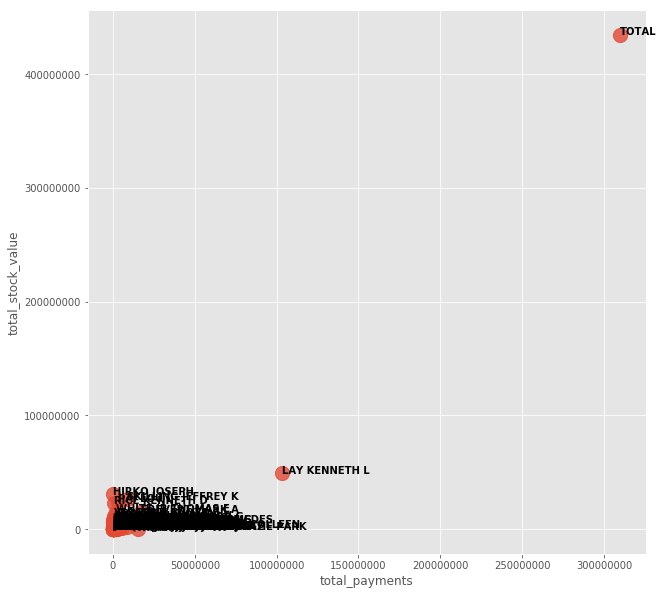

In [6]:
df = df.fillna(0)
plt.figure(figsize = (10,10))
plt.ticklabel_format(style = 'plain')
p1 = sns.regplot(data = df, x = 'total_payments', y = 'total_stock_value', fit_reg=False , marker= 'o', scatter_kws={'s':200})
for line in range(0, df.shape[0]):
     p1.text(df.total_payments[line]+2, df.total_stock_value[line]+2, df.name[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

### 發現
有一筆名為TOTAL的資料，後續建模時應留意，如果資料在訓練集應排除，如果在測試集則可以強制指定為非詐欺犯。

另外也可以透過TOTAL驗證資料的正確性（確認所有人資料的總合是否等於TOTAL）

<Figure size 1440x1440 with 0 Axes>

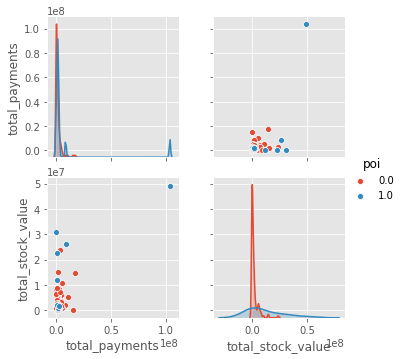

In [7]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['total_payments', 'total_stock_value'],
             hue = 'poi')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


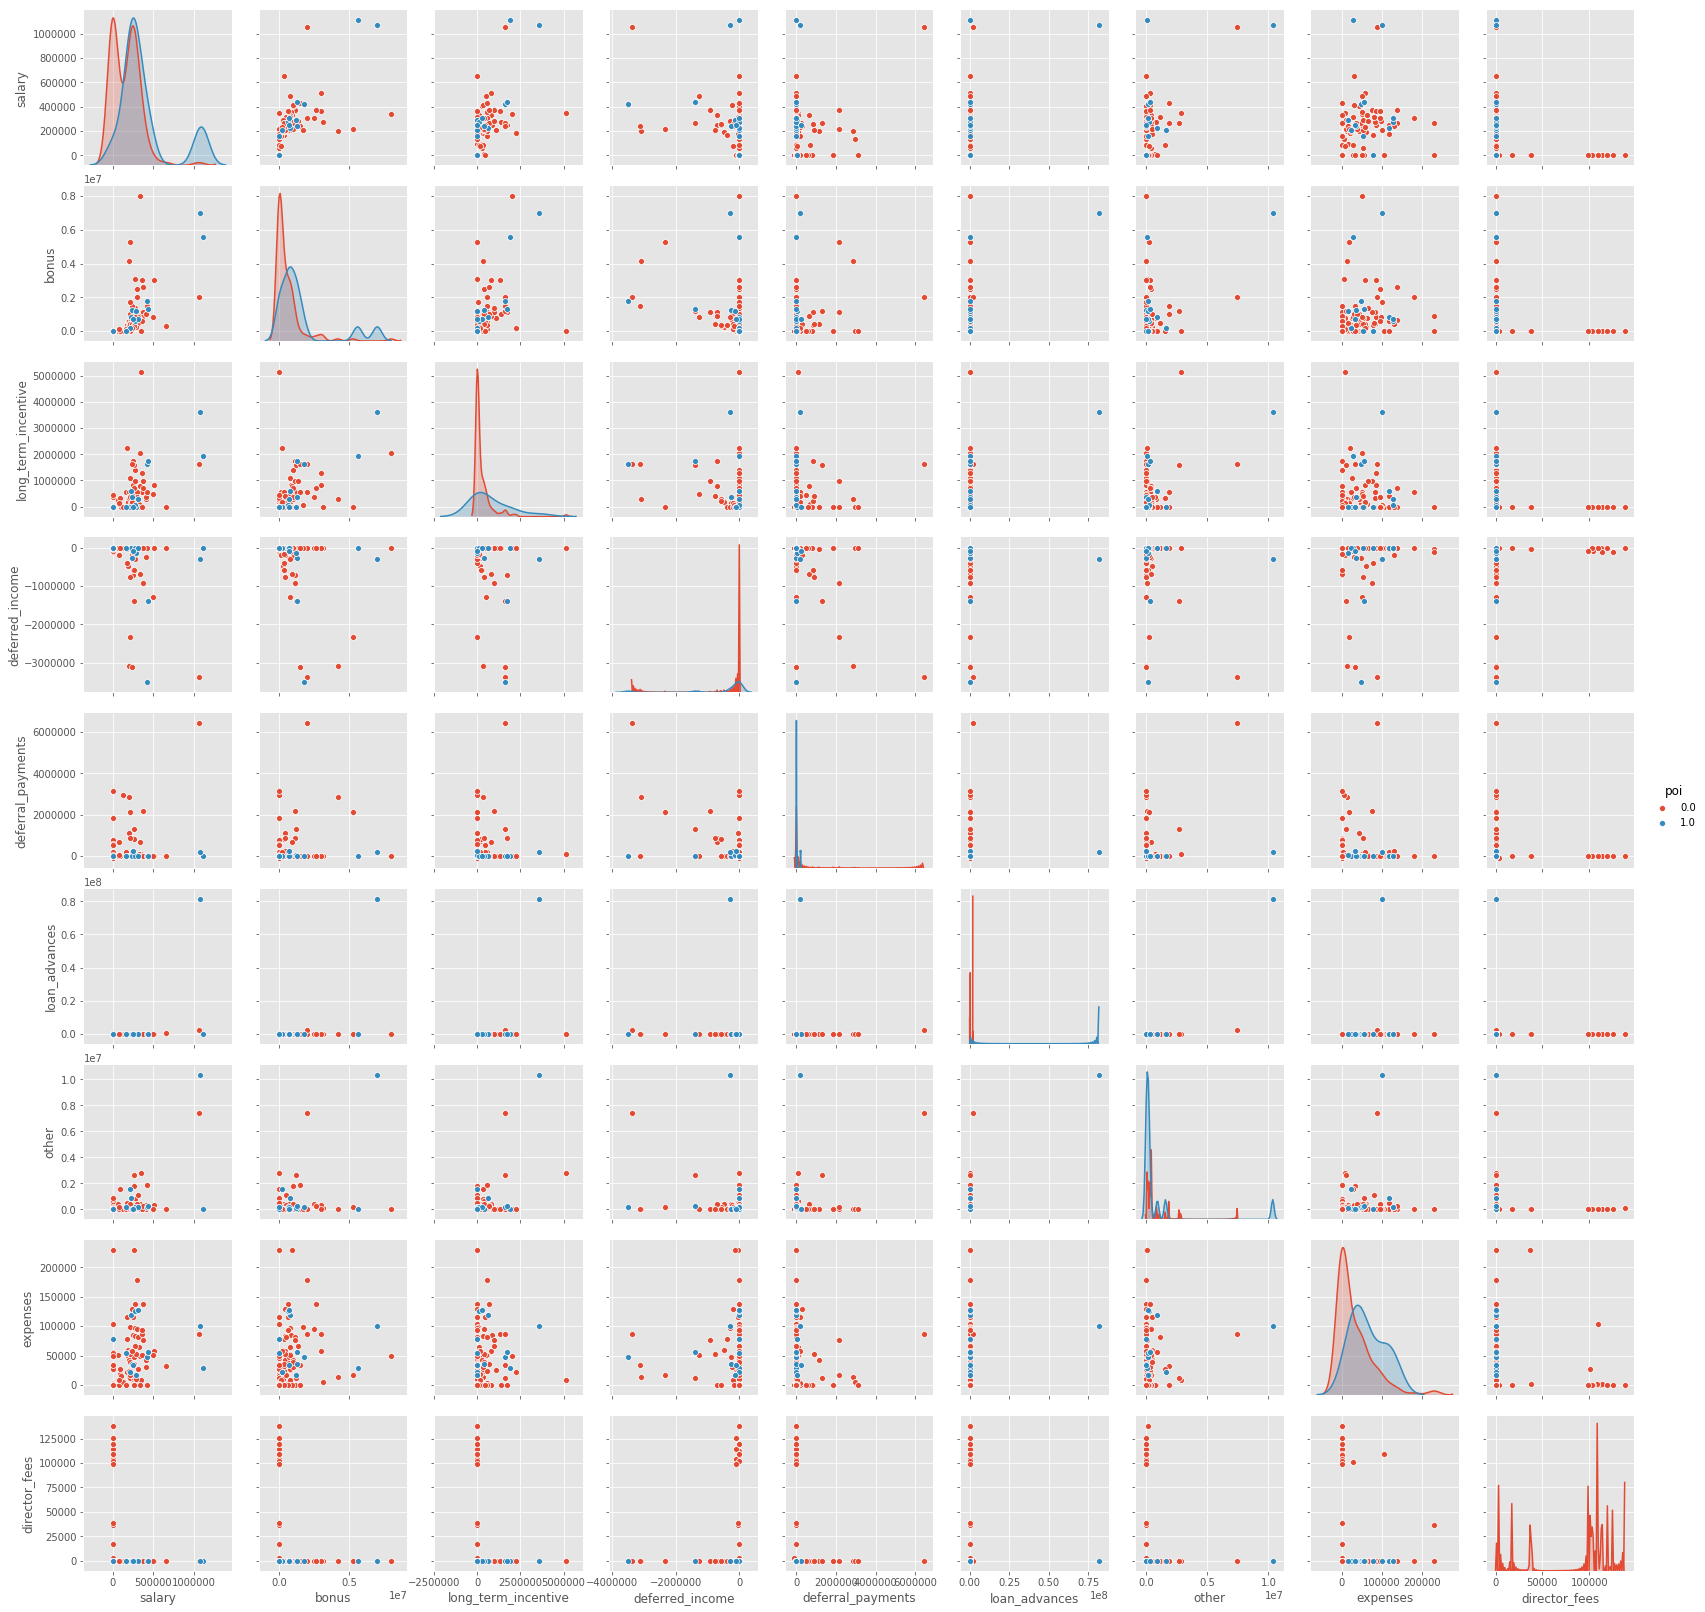

In [8]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees'],
             hue = 'poi')

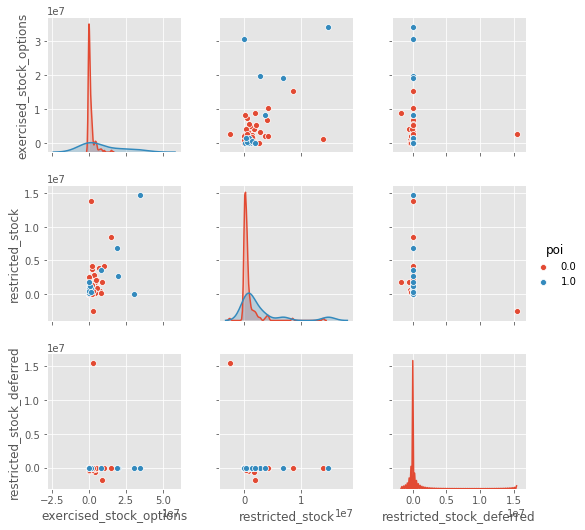

In [9]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred'],
             hue = 'poi')

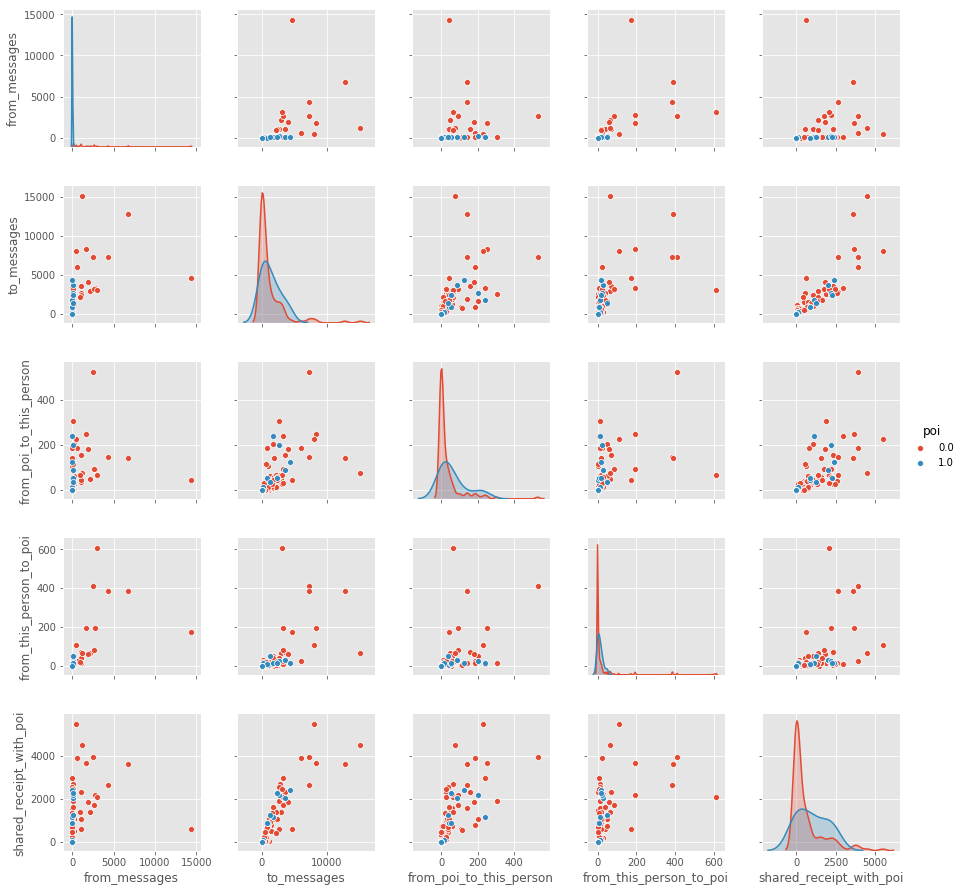

In [10]:
sns.pairplot(data = df.loc[df.name != 'TOTAL'],
             vars = ['from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',  'shared_receipt_with_poi'],
             hue = 'poi')

## 驗證資料

In [11]:
columns = ['total_payments', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees',
           'total_stock_value', 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred',
           'from_messages', 'to_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 
for i in columns:
    sumvalue = df.loc[df.name != 'TOTAL', i].sum()
    totalvalue = df.loc[df.name == 'TOTAL',i].values[0]
    if sumvalue != totalvalue:
        print('Warning! Please check "' + i + '"!!!!!!!!!!!!!!!')
    else:
        print(i + ' pass.')

Warning! Please check "total_payments"!!!!!!!!!!!!!!!
salary pass.
bonus pass.
long_term_incentive pass.
Warning! Please check "deferred_income"!!!!!!!!!!!!!!!
Warning! Please check "deferral_payments"!!!!!!!!!!!!!!!
loan_advances pass.
Warning! Please check "other"!!!!!!!!!!!!!!!
Warning! Please check "expenses"!!!!!!!!!!!!!!!
Warning! Please check "director_fees"!!!!!!!!!!!!!!!
Warning! Please check "total_stock_value"!!!!!!!!!!!!!!!
Warning! Please check "exercised_stock_options"!!!!!!!!!!!!!!!
Warning! Please check "restricted_stock"!!!!!!!!!!!!!!!
Warning! Please check "restricted_stock_deferred"!!!!!!!!!!!!!!!
Warning! Please check "from_messages"!!!!!!!!!!!!!!!
Warning! Please check "to_messages"!!!!!!!!!!!!!!!
Warning! Please check "from_poi_to_this_person"!!!!!!!!!!!!!!!
Warning! Please check "from_this_person_to_poi"!!!!!!!!!!!!!!!
Warning! Please check "shared_receipt_with_poi"!!!!!!!!!!!!!!!


WOW!居然發現有這麽多個欄位的總合不等於TOTAL，看來很有必要確認資料的正確性！

由於資料中有'total_payments'與'total_stock_value'兩個欄位，分別可以用來驗算各個細項的加總，因此我們可以寫個簡單的迴圈找出到底是誰的資料出了問題。

對應的項目如下：

Total Payments = Salary + Bonus + Long Term Incentive + Deferred Income + Deferral Payments + Loan Advances + Other + Expenses + Director Fees

Total Stock Value = Exercised Stock Options + Restricted Stock + Restricted Stock Deferred 

至於mail類的資料則因為無法驗算先pass

In [12]:
for i in range(len(df)):
    sum_payments = df.loc[i,['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees']].sum()
    if sum_payments != df.total_payments[i]:
        print(df.name[i] + ' sum_payments is ' + str(sum_payments) + ',but total_payments is ' + str(df.total_payments[i]))
    sum_stock_value = df.loc[i,['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred']].sum()
    if sum_stock_value != df.total_stock_value[i]:
        print(df.name[i] + ' sum_stock_value is ' + str(sum_stock_value) + ' ,but total_stock_value is ' + str(df.total_stock_value[i]))

BELFER ROBERT sum_payments is -99215.0,but total_payments is 102500.0
BELFER ROBERT sum_stock_value is 47378.0 ,but total_stock_value is -44093.0
BHATNAGAR SANJAY sum_payments is 275728.0,but total_payments is 15456290.0
BHATNAGAR SANJAY sum_stock_value is 15456290.0 ,but total_stock_value is 0.0


發現了以上兩人的資料有問題，我們就參考pdf中的資料進行修正

In [13]:
df.loc[[bool(re.search('BELFER ROBERT|BHATNAGAR SANJAY', i)) for i in df.name],:]

,name,email_address,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,poi,Note
50,BELFER ROBERT,0,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0,3285.0,0.0,44093.0,-44093.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
139,BHATNAGAR SANJAY,sanjay.bhatnagar@enron.com,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0,2604490.0,-2604490.0,15456290.0,0.0,29.0,523.0,0.0,1.0,463.0,0.0,Test


### 修復資料

In [ ]:
# BELFER ROBERT
df.loc[df.name == 'BELFER ROBERT',  ['salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments','exercised_stock_options', 'restricted_stock','restricted_stock_deferred','total_stock_value']] = [0,0,0,-102500.0,0,0,0,3285,102500,3285,0,44093.0,-44093.0,0]

# BHATNAGAR SANJAY
df.loc[df.name == 'BHATNAGAR SANJAY', ['salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments', 'exercised_stock_options', 'restricted_stock','restricted_stock_deferred','total_stock_value']] = [0,0,0,0,0,0,0,137864,0,137864, 15456290,2604490,-2604490,15456290]

## Feature engineer

- Category

假设有一个 Categorical Variable 一共有几万个取值可能，那么创建 Dummy Variables 的方法就不可行了。这时一个比较好的方法是根据 Feature Importance 或是这些取值本身在数据中的出现频率，为最重要（比如说前 95% 的 Importance）那些取值（有很大可能只有几个或是十几个）创建 Dummy Variables，而所有其他取值都归到一个“其他”类里面。

- Numeric


### 標註並填補遺漏值
比對[競賽網頁](https://www.kaggle.com/c/ml100marathon/data)中提供的說明文件後可以知道，這些欄位中的NA是0的意思，在這裡我們將其填補為0。

In [14]:
# for i in columns:
#     df[i + '_mis'] = np.select([df[i] == 0, True], [1,0])
df['email_address'] = np.select([df['email_address'] == 0, True], [1,0])

### 特征組合

In [15]:
df['sum_total_payments_total_stock_value'] = df.total_payments + df.total_stock_value
df['interact_with_poi'] = df.from_poi_to_this_person + df.from_poi_to_this_person

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 25 columns):
name                                    146 non-null object
email_address                           146 non-null int32
salary                                  146 non-null float64
bonus                                   146 non-null float64
long_term_incentive                     146 non-null float64
deferred_income                         146 non-null float64
deferral_payments                       146 non-null float64
loan_advances                           146 non-null float64
other                                   146 non-null float64
expenses                                146 non-null float64
director_fees                           146 non-null float64
total_payments                          146 non-null float64
exercised_stock_options                 146 non-null float64
restricted_stock                        146 non-null float64
restricted_stock_deferred               146 

## Train Test split

In [17]:
# drop some columns
predictors = [x for x in df.columns if x not in ['name', 'Note', 'poi']]

X_train = df.loc[df.Note == 'Train', predictors]
Y_train = df.loc[df.Note == 'Train', 'poi']
X_test  = df.loc[df.Note == 'Test', :]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(113, 22)
(113,)
(33, 25)


## 不平衡資料處理

In [18]:
Y_train.value_counts()

0.0    100
1.0     13
Name: poi, dtype: int64

由於目標變數極度的不平衡，正式建模前需要處理不平衡的問題。
不平衡的問題有三種處理方式，分別是：

- Downsampling：減少主要類別的採樣
- Upsampling：提升少數類別的採樣
- Mix：同時減少主要類別與提升少數類別的採樣

當資料量大的時候透過Downsampling可以降低計算時間，資料量少的時候由於每筆樣本都很重要，適合Upsampling。
由於這份資料的樣本數量非常少，所以我選擇用Upsampling的方式處理不平衡問題。

In [19]:
sm = SMOTE(random_state=4)
X_train_res, Y_train_res = sm.fit_sample(X = X_train,y = Y_train)
X_train_res = pd.DataFrame(X_train_res, columns = X_train.columns)
print(X_train_res.shape)
print(Y_train_res.shape)

(200, 22)
(200,)


# Model Selection
- Gradient Boosting
- Random Forest
- Extra Randomized Trees

- SVM
- Linear Regression
- Logistic Regression
- Neural Networks

## Gradient Boosting

parameter tuning
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

### Feature Selection by default parameters

,column,importances
7,other,0.434912
8,expenses,0.144711
18,from_this_person_to_poi,0.117996
4,deferred_income,0.068966
15,from_messages,0.046240
20,sum_total_payments_total_stock_value,0.037169
12,restricted_stock,0.037092
11,exercised_stock_options,0.019230
2,bonus,0.018702
14,total_stock_value,0.018557


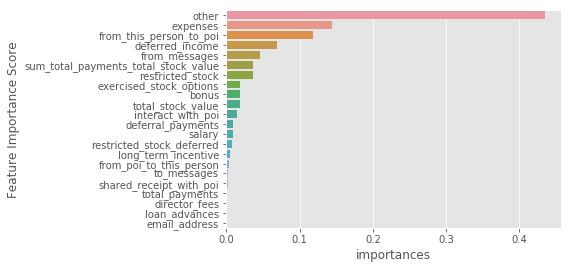

In [20]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_res, Y_train_res)


# Feature Importance
feat_imp = pd.DataFrame(data ={'column': X_train_res.columns,
                               'importances':gb_clf.feature_importances_}).sort_values( by = 'importances',ascending=False)
sns.barplot(x = 'importances', y = 'column', data = feat_imp)
plt.ylabel('Feature Importance Score')
feat_imp
# #Print model report:
# print("\nModel Report")
# print("Accuracy : %.4g" % accuracy_score(Y_train, gb_clf.predict(X_train)))
# print("AUC Score (Train): %f" % roc_auc_score(Y_train, gb_clf.predict_proba(X_train)[:,1]))


In [21]:
vaidScore=[]
accScore=[]
recallScore=[]
F1Score=[]
for i in range(1,(len(X_train_res.columns)+1)//2):
    x_train, x_valid, y_train, y_valid = train_test_split(X_train_res[feat_imp.column[:i]], Y_train_res,
                                                          test_size=0.25, random_state=4)  
    
    gb_clf.fit(x_train, y_train)
    y_pred = gb_clf.predict(x_valid)

    accScore.append(gb_clf.score(x_valid,y_valid))
    vaidScore.append(cross_val_score(gb_clf, x_train, y_train, cv=5).mean())
    recallScore.append(recall_score(y_true=y_valid, y_pred=y_pred))
    F1Score.append(f1_score(y_true=y_valid, y_pred=y_pred))
    
pd.DataFrame({'vaidScore':vaidScore,
              'accScore':accScore,
              'recallScore':recallScore,
              'F1Score':F1Score})

,vaidScore,accScore,recallScore,F1Score
0,0.792495,0.78,0.851852,0.807018
1,0.875239,0.82,0.925926,0.847458
2,0.900586,0.84,0.925926,0.862069
3,0.893459,0.86,0.888889,0.872727
4,0.906148,0.88,0.962963,0.896552
5,0.906148,0.92,1.000000,0.931034
6,0.899481,0.88,0.962963,0.896552
7,0.899481,0.88,0.962963,0.896552
8,0.899941,0.88,0.962963,0.896552
9,0.893489,0.88,0.962963,0.896552


這裡選取最重要的5個欄位開始建模與調參

In [22]:
# 挑選最重要的6個變數擬合模型
# 重新平衡資料是避免新
sm = SMOTE(random_state=4)
X_train_res, Y_train_res = sm.fit_sample(X = X_train[feat_imp.column[:6]],y = Y_train)
X_train_res = pd.DataFrame(X_train_res, columns = X_train[feat_imp.column[:6]].columns)
print(X_train_res.shape)
print(Y_train_res.shape)

x_train, x_valid, y_train, y_valid = train_test_split(X_train_res, Y_train_res,
                                                      test_size=0.25, random_state=4)  
print(x_train.shape)
print(y_train.shape)

(200, 6)
(200,)
(150, 6)
(150,)


In [23]:
cross_val_score(estimator = GradientBoostingClassifier(),X = x_train, y = y_train, cv=10).mean()

0.9394047619047619

### GridsearchCV
訓練成本高的時候可以逐一調參（低的時候可以直接開grid search）
- Step：
 1. n_estimators
 2. max_depth 
 3. num_samples_split
 4. min_samples_leaf
 5. max_features
 6. learning rate

In [24]:
param_grid = {'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
              'n_estimators': range(20,200,10),
              'max_depth': [3, 4, 5],
              'max_features':['sqrt', 'log2'],
              'subsample':[0.6,0.7,0.8,0.9,1.0]}

GridSearchGBDT = GridSearchCV(estimator = GradientBoostingClassifier(random_state = 10),
                              param_grid = param_grid,
                              scoring = 'roc_auc',
                              n_jobs = -1,
                              iid = False,
                              cv = 5)
GridSearchGBDT.fit(X_train_res, Y_train_res)
print('Scores: ' + str(GridSearchGBDT.best_score_))
print(GridSearchGBDT.best_params_)

Scores: 0.998
{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 110, 'subsample': 1.0}


In [25]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,
                                 n_estimators = 30,
                                 max_depth = 3,
                                 max_features = 'sqrt',
                                 subsample = 0.9)
gbm.fit(X_train_res, Y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
# 79285
submission = pd.DataFrame({ 'name': X_test['name'],
                            'poi': gbm.predict_proba(X_test[feat_imp.column[:6]]) [:,1]})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("C:/Users/TL_Yu/Documents/GitHub/100Day-ML-Marathon/Day_049_MidtermExam/gbdt.csv", index=False)
submission.head()

,name,poi
113,BELDEN TIMOTHY N,0.504964
114,BOWEN JR RAYMOND M,0.474540
115,HANNON KEVIN P,0.925429
116,DELAINEY DAVID W,0.090667
117,CAUSEY RICHARD A,0.933133


In [27]:
submission

,name,poi
113,BELDEN TIMOTHY N,0.504964
114,BOWEN JR RAYMOND M,0.474540
115,HANNON KEVIN P,0.925429
116,DELAINEY DAVID W,0.090667
117,CAUSEY RICHARD A,0.933133
118,HICKERSON GARY J,0.368988
119,FREVERT MARK A,0.937514
120,CHAN RONNIE,0.048541
121,DONAHUE JR JEFFREY M,0.611605
122,REYNOLDS LAWRENCE,0.114156


### 逐步調參

In [97]:
learning_rate = {'learning_rate':[0.1, 0.05, 0.01, 0.005, 0.001]}
search_learning_rate = GridSearchCV(estimator = GradientBoostingClassifier(# learning_rate = 0.1,
                                                                           n_estimators = 100, 
                                                                           # min_samples_split = 1,
                                                                           # min_samples_leaf = 1,
                                                                           max_depth = 6,
                                                                           max_features = 'sqrt',
                                                                           subsample = 0.8,
                                                                           random_state = 10),
                                    param_grid = learning_rate,
                                    scoring = 'roc_auc',
                                    n_jobs = -1,
                                    iid = False,
                                    cv = 5)
search_learning_rate.fit(X_train[features], Y_train)
print('Scores: ' + str(search_learning_rate.best_score_))
print('Best learning_rate is : ' + str(search_learning_rate.best_params_['learning_rate']))

Scores: 0.8216666666666667
Best learning_rate is : 0.05


In [98]:
n_estimators = {'n_estimators':range(20,200,10)}
search_n_estimators = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = search_learning_rate.best_params_['learning_rate'],
                                                                          # n_estimators = 100,
                                                                          # min_samples_split = 1,
                                                                          # min_samples_leaf = 1,
                                                                          max_depth = 6,
                                                                          max_features = 'sqrt',
                                                                          subsample = 0.8,
                                                                          random_state = 10),
                                   param_grid = n_estimators,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_n_estimators.fit(X_train[features], Y_train)
print('Scores: ' + str(search_n_estimators.best_score_))
print('Best n_estimators is : ' + str(search_n_estimators.best_params_['n_estimators']))

Scores: 0.8366666666666667
Best n_estimators is : 160


In [99]:
max_depth = {'max_depth':[3,4,5,6,7,8,9,10]}
search_max_depth = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = search_learning_rate.best_params_['learning_rate'],
                                                                       n_estimators = search_n_estimators.best_params_['n_estimators'],
                                                                       # min_samples_split = 1,
                                                                       # min_samples_leaf = 1,
                                                                       # max_depth = 6,
                                                                       max_features = 'sqrt',
                                                                       subsample = 0.8,
                                                                       random_state = 10),
                                   param_grid = max_depth,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_max_depth.fit(X_train[features], Y_train)
print('Scores: ' + str(search_max_depth.best_score_))
print('Best max_depth is : ' + str(search_max_depth.best_params_['max_depth']))

Scores: 0.8400000000000001
Best max_depth is : 3


In [100]:
max_features = {'max_features':['sqrt', 'log2']}
search_max_features = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = search_learning_rate.best_params_['learning_rate'],
                                                                       n_estimators = search_n_estimators.best_params_['n_estimators'],
                                                                       # min_samples_split = 1,
                                                                       # min_samples_leaf = 1,
                                                                       max_depth = search_max_depth.best_params_['max_depth'],
                                                                       # max_features = 'sqrt',
                                                                       subsample = 0.8,
                                                                       random_state = 10),
                                   param_grid = max_features,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_max_features.fit(X_train[features], Y_train)
print('Scores: ' + str(search_max_features.best_score_))
print('Best max_features is : ' + str(search_max_features.best_params_['max_features']))

Scores: 0.8400000000000001
Best max_features is : sqrt


In [101]:
subsample = {'subsample':[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]}
search_subsample = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate = search_learning_rate.best_params_['learning_rate'],
                                                                       n_estimators = search_n_estimators.best_params_['n_estimators'],
                                                                       # min_samples_split = 1,
                                                                       # min_samples_leaf = 1,
                                                                       max_depth = search_max_depth.best_params_['max_depth'],
                                                                       max_features = search_max_features.best_params_['max_features'],
                                                                       # subsample = 0.8,
                                                                       random_state = 10),
                                   param_grid = subsample,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_subsample.fit(X_train[features], Y_train)
print('Scores: ' + str(search_subsample.best_score_))
print('Best subsample is : ' + str(search_subsample.best_params_['subsample']))

Scores: 0.8400000000000001
Best subsample is : 0.8


### Train final model

In [103]:
gbdt = GradientBoostingClassifier(learning_rate = search_learning_rate.best_params_['learning_rate'],
                                  n_estimators = search_n_estimators.best_params_['n_estimators'],
                                  max_depth = search_max_depth.best_params_['max_depth'],
                                  max_features = search_max_features.best_params_['max_features'],
                                  subsample = search_subsample.best_params_['subsample'],
                                  loss = 'deviance',
                                  random_state = 4)
gbdt.fit(X_train[features], Y_train)
# result on train set

print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_train, gbdt.predict(X_train[features])))
print("AUC Score (Train): %f" % roc_auc_score(Y_train, gbdt.predict_proba(X_train[features])[:,1]))


Model Report
Accuracy : 1
AUC Score (Train): 1.000000


### Submit

In [104]:
# 79285
submission = pd.DataFrame({ 'name': X_test['name'],
                            'poi': gbdt.predict_proba(X_test[features]) [:,1]})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("C:/Users/TL_Yu/Documents/GitHub/100Day-ML-Marathon/Day_049_MidtermExam/gbdt.csv", index=False)
submission.head()

,name,poi
113,BELDEN TIMOTHY N,0.423613
114,BOWEN JR RAYMOND M,0.173499
115,HANNON KEVIN P,0.456629
116,DELAINEY DAVID W,0.002851
117,CAUSEY RICHARD A,0.109703


In [75]:
gbdt.predict_proba(X_test[feat_imp.column[:5]])

SyntaxError: unexpected EOF while parsing (<ipython-input-75-8b3e2e03f0e6>, line 1)

In [72]:
feat_imp = pd.Series(gbdt.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

ValueError: Length of passed values is 5, index implies 39

In [30]:
feat_imp

exercised_stock_options                            7.253861e-02
total_stock_value                                  7.179520e-02
expenses                                           5.105514e-02
other_2_total_payments                             4.982882e-02
other                                              4.391855e-02
bonus                                              4.215173e-02
exercised_stock_options_restricted_stock           4.173178e-02
expenses_2_total_payments                          3.857631e-02
restricted_stock                                   3.635227e-02
salary_bonus                                       3.620645e-02
salary                                             3.283538e-02
shared_receipt_with_poi                            2.942057e-02
exercised_stock_options_2_total_stock_value        2.938504e-02
total_payments                                     2.788240e-02
from_poi_to_this_person_from_this_person_to_poi    2.696165e-02
long_term_incentive_bonus               

## Randomforest


### Default parameters

In [31]:
rf = RandomForestClassifier()
model = cross_val_score(rf, X_train, Y_train, cv = 5, scoring = 'roc_auc')
print("\nModel Report: Mean AUC score is: " + str(model.mean()) + '.')


Model Report: Mean AUC score is: 0.6716666666666666.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

### GridsearchCV
Step：
- n_estimators
- max_features

In [32]:
n_estimators = {'n_estimators':[100, 200, 300, 400, 500]}
search_n_estimators = GridSearchCV(estimator = RandomForestClassifier(# n_estimators = 100, 
                                                                      max_features = 'sqrt',
                                                                      random_state = 10),
                                   param_grid = n_estimators,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_n_estimators.fit(X_train, Y_train)
print('Scores: ' + str(search_n_estimators.best_score_))
print('Best n_estimators is : ' + str(search_n_estimators.best_params_['n_estimators']))

Scores: 0.7816666666666665
Best n_estimators is : 100


In [33]:
max_features = {'max_features':['sqrt', 'log2']}
search_max_features = GridSearchCV(estimator = RandomForestClassifier(n_estimators = search_n_estimators.best_params_['n_estimators'], 
                                                                      # max_features = 'sqrt',
                                                                      random_state = 10),
                                   param_grid = max_features,
                                   scoring = 'roc_auc',
                                   n_jobs = -1,
                                   iid = False,
                                   cv = 5)
search_max_features.fit(X_train, Y_train)
print('Scores: ' + str(search_max_features.best_score_))
print('Best max_features is : ' + str(search_max_features.best_params_['max_features']))

Scores: 0.7816666666666665
Best max_features is : sqrt


### Train final model

In [34]:
rf = RandomForestClassifier(n_estimators = search_n_estimators.best_params_['n_estimators'],
                            max_features = search_max_features.best_params_['max_features'],
                            random_state = 10)
rf.fit(X_train, Y_train)
# result on train set

print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_train, rf.predict(X_train)))
print("AUC Score (Train): %f" % roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1]))


Model Report
Accuracy : 1
AUC Score (Train): 1.000000


## XGBoost
ref：https://www.twblogs.net/a/5b8cb0122b7177188334941a

eta：每次迭代完成后更新权重时的步长。越小训练越慢。

num_round：总共迭代的次数。

subsample：训练每棵树时用来训练的数据占全部的比例。用于防止 Overfitting。

colsample_bytree：训练每棵树时用来训练的特征的比例，类似 RandomForestClassifier 的 max_features。

max_depth：每棵树的最大深度限制。与 Random Forest 不同，Gradient Boosting 如果不对深度加以限制，最终是会 Overfit 的。

early_stopping_rounds：用于控制在 Out Of Sample 的验证集上连续多少个迭代的分数都没有提高后就提前终止训练。用于防止 Overfitting。

一般的调参步骤是：

将训练数据的一部分划出来作为验证集。

先将 eta 设得比较高（比如 0.1），num_round 设为 300 ~ 500。

用 Grid Search 对其他参数进行搜索

逐步将 eta 降低，找到最佳值。

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

X_dtrain, X_deval, y_dtrain, y_deval = cross_validation.train_test_split(X_train, y_train, random_state=1026, test_size=0.3)
dtrain = xgb.DMatrix(X_dtrain, y_dtrain)
deval = xgb.DMatrix(X_deval, y_deval)
watchlist = [(deval, 'eval')]
params = {
    'booster': 'gbtree',
    'objective': 'reg:linear',
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'eta': 0.05,
    'max_depth': 7,
    'seed': 2016,
    'silent': 0,
    'eval_metric': 'rmse'
}
clf = xgb.train(params, dtrain, 500, watchlist, early_stopping_rounds=50)
pred = clf.predict(xgb.DMatrix(df_test))

In [35]:
# import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### Default parameters

In [36]:
xgb = XGBClassifier()
model = cross_val_score(xgb, X_train, Y_train, cv = 5, scoring = 'roc_auc')
print("\nModel Report: Mean AUC score is: " + str(model.mean()) + '.')


Model Report: Mean AUC score is: 0.7666666666666666.


### GridsearchCV
step:
- max_depth
- min_child_weight
- gamma
- subsample
- colsample_bytree
- Regularization
- Learning Rate

In [37]:
max_depth = {'max_depth':[2, 3, 4, 5, 6, 7, 8]}
search_max_depth = GridSearchCV(estimator = XGBClassifier(# max_depth = 3,
                                                          min_child_weight = 1, 
                                                          gamma = 0,
                                                          subsample = 1,
                                                          colsample_bytree = 1,
                                                          reg_alpha = 0,
                                                          reg_lambda = 1,
                                                          learning_rate = 0.1),
                                param_grid = max_depth,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_max_depth.fit(X_train, Y_train)
print('Scores: ' + str(search_max_depth.best_score_))
print('Best max_depth is : ' + str(search_max_depth.best_params_['max_depth']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706

Scores: 0.7833333333333333
Best max_depth is : 2


In [38]:
min_child_weight = {'min_child_weight':[1, 2, 3, 4, 5, 6]}
search_min_child_weight = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                 # min_child_weight = 1,
                                                                 gamma = 0,
                                                                 subsample = 1,
                                                                 colsample_bytree = 1,
                                                                 reg_alpha = 0,
                                                                 reg_lambda = 1,
                                                                 learning_rate = 0.1),
                                param_grid = min_child_weight,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_min_child_weight.fit(X_train, Y_train)
print('Scores: ' + str(search_min_child_weight.best_score_))
print('Best min_child_weight is : ' + str(search_min_child_weight.best_params_['min_child_weight']))

Scores: 0.8175000000000001
Best min_child_weight is : 6


In [39]:
gamma = {'gamma':[0.1, 0.2, 0.3, 0.4, 0.5]}
search_gamma = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  # gamma = 0,
                                                                  subsample = 1,
                                                                  colsample_bytree = 1,
                                                                  reg_alpha = 0,
                                                                  reg_lambda = 1,
                                                                  learning_rate = 0.1),
                                param_grid = gamma,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_gamma.fit(X_train, Y_train)
print('Scores: ' + str(search_gamma.best_score_))
print('Best gamma is : ' + str(search_gamma.best_params_['gamma']))

Scores: 0.8175000000000001
Best gamma is : 0.1


In [40]:
subsample = {'subsample':[0.6, 0.7, 0.8, 0.9, 1.0]}
search_subsample = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  gamma = search_gamma.best_params_['gamma'],
                                                                  # subsample = 1,
                                                                  colsample_bytree = 1,
                                                                  reg_alpha = 0,
                                                                  reg_lambda = 1,
                                                                  learning_rate = 0.1),
                                param_grid = subsample,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_subsample.fit(X_train, Y_train)
print('Scores: ' + str(search_subsample.best_score_))
print('Best subsample is : ' + str(search_subsample.best_params_['subsample']))

Scores: 0.8458333333333332
Best subsample is : 0.6


In [41]:
colsample_bytree = {'colsample_bytree':[0.6, 0.7, 0.8, 0.9, 1.0]}
search_colsample_bytree = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  gamma = search_gamma.best_params_['gamma'],
                                                                  subsample = search_subsample.best_params_['subsample'],
                                                                  # colsample_bytree = 1,
                                                                  reg_alpha = 0,
                                                                  reg_lambda = 1,
                                                                  learning_rate = 0.1),
                                param_grid = colsample_bytree,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_colsample_bytree.fit(X_train, Y_train)
print('Scores: ' + str(search_colsample_bytree.best_score_))
print('Best colsample_bytree is : ' + str(search_colsample_bytree.best_params_['colsample_bytree']))

Scores: 0.8574999999999999
Best colsample_bytree is : 0.9


In [42]:
reg_alpha = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1]}
search_reg_alpha = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  gamma = search_gamma.best_params_['gamma'],
                                                                  subsample = search_subsample.best_params_['subsample'],
                                                                  colsample_bytree = search_colsample_bytree.best_params_['colsample_bytree'],
                                                                  # reg_alpha = 0,
                                                                  reg_lambda = 1,
                                                                  learning_rate = 0.1),
                                param_grid = reg_alpha,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_reg_alpha.fit(X_train, Y_train)
print('Scores: ' + str(search_reg_alpha.best_score_))
print('Best reg_alpha is : ' + str(search_reg_alpha.best_params_['reg_alpha']))

Scores: 0.8574999999999999
Best reg_alpha is : 0


In [43]:
reg_lambda = {'reg_lambda':[0.6, 0.7, 0.8, 0.9, 1.0]}
search_reg_lambda = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  gamma = search_gamma.best_params_['gamma'],
                                                                  subsample = search_subsample.best_params_['subsample'],
                                                                  colsample_bytree = search_colsample_bytree.best_params_['colsample_bytree'],
                                                                  reg_alpha = search_reg_alpha.best_params_['reg_alpha'],
                                                                  # reg_lambda = 1,
                                                                  learning_rate = 0.1),
                                param_grid = reg_lambda,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_reg_lambda.fit(X_train, Y_train)
print('Scores: ' + str(search_reg_lambda.best_score_))
print('Best reg_lambda is : ' + str(search_reg_lambda.best_params_['reg_lambda']))

Scores: 0.8908333333333334
Best reg_lambda is : 0.6


In [44]:
learning_rate = {'learning_rate':[0.2, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001]}
search_learning_rate = GridSearchCV(estimator = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                                                                  min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                                                                  gamma = search_gamma.best_params_['gamma'],
                                                                  subsample = search_subsample.best_params_['subsample'],
                                                                  colsample_bytree = search_colsample_bytree.best_params_['colsample_bytree'],
                                                                  reg_alpha = search_reg_alpha.best_params_['reg_alpha'],
                                                                  reg_lambda = search_reg_lambda.best_params_['reg_lambda'],
                                                                  # learning_rate = 0.1
                                                          ),
                                param_grid = learning_rate,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                iid = False,
                                cv = 5)
search_learning_rate.fit(X_train, Y_train)
print('Scores: ' + str(search_learning_rate.best_score_))
print('Best learning_rate is : ' + str(search_learning_rate.best_params_['learning_rate']))

Scores: 0.8908333333333334
Best learning_rate is : 0.1


### Train final model

In [69]:
xgbTree = XGBClassifier(max_depth = search_max_depth.best_params_['max_depth'],
                    min_child_weight = search_min_child_weight.best_params_['min_child_weight'],
                    gamma = search_gamma.best_params_['gamma'],
                    subsample = search_subsample.best_params_['subsample'],
                    colsample_bytree = search_colsample_bytree.best_params_['colsample_bytree'],
                    reg_alpha = search_reg_alpha.best_params_['reg_alpha'],
                    reg_lambda = search_reg_lambda.best_params_['reg_lambda'],
                    learning_rate = search_learning_rate.best_params_['learning_rate'])
xgbTree.fit(X_train, Y_train)
# result on train set

print("\nModel Report")
print("Accuracy : %.4g" % accuracy_score(Y_train, xgbTree.predict(X_train)))
print("AUC Score (Train): %f" % roc_auc_score(Y_train, xgbTree.predict_proba(X_train)[:,1]))


Model Report
Accuracy : 0.885
AUC Score (Train): 0.898462


In [71]:
xgbTree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17533527, 0.14254528, 0.        , 0.        ,
       0.        , 0.10810616, 0.        , 0.07768699, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15856801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1017939 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.23596439, 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

## LightGBM
https://blog.csdn.net/u012735708/article/details/83749703

# Submit

In [67]:
submission = pd.DataFrame({ 'name': X_test['name'],
                            'poi': rf.predict_proba(X_test.loc[:,predictors])[:,1]})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("C:/Users/TL_Yu/Documents/GitHub/100Day-ML-Marathon/Day_049_MidtermExam/rf.csv", index=False)
submission.head()

,name,poi
113,BELDEN TIMOTHY N,0.26
114,BOWEN JR RAYMOND M,0.33
115,HANNON KEVIN P,0.50
116,DELAINEY DAVID W,0.14
117,CAUSEY RICHARD A,0.56


In [70]:
submission = pd.DataFrame({ 'name': X_test['name'],
                            'poi': xgbTree.predict_proba(X_test.loc[:,predictors])[:,1]})
submission.loc[submission.name == 'TOTAL', 'poi'] = 0
submission.to_csv("C:/Users/TL_Yu/Documents/GitHub/100Day-ML-Marathon/Day_049_MidtermExam/xgbTree.csv", index=False)
submission.head()

,name,poi
113,BELDEN TIMOTHY N,0.158904
114,BOWEN JR RAYMOND M,0.100234
115,HANNON KEVIN P,0.212097
116,DELAINEY DAVID W,0.115465
117,CAUSEY RICHARD A,0.195988


# Past

# ref

在圖形中加入名稱
https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/